In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
class KNearestNeighbors:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None
    
    def _calculate_distance(self, point1, point2):
        """Calculate distance between two points"""
        point1 = np.array(point1)
        point2 = np.array(point2)
        
        if self.distance_metric == 'euclidean':
            return np.sqrt(np.sum((point1 - point2) ** 2))
        elif self.distance_metric == 'manhattan':
            return np.sum(np.abs(point1 - point2))
        else:
            raise ValueError("Distance metric must be 'euclidean' or 'manhattan'")
    
    def fit(self, X, y):
        """Store the training data"""
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        print(f"Stored {len(self.X_train)} training samples")
    
    def _predict_single(self, x):
        """Predict the class for a single data point"""
        distances = []
        for i, train_point in enumerate(self.X_train):
            dist = self._calculate_distance(x, train_point)
            distances.append((dist, self.y_train[i]))
        
        # Sort by distance and get k nearest neighbors
        distances.sort(key=lambda x: x[0])
        k_nearest = distances[:self.k]
        
        # Get the most common class among neighbors
        k_nearest_labels = [label for (_, label) in k_nearest]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
    def predict(self, X):
        """Predict classes for multiple data points"""
        X = np.array(X)
        return np.array([self._predict_single(x) for x in X])
    
    def score(self, X, y):
        """Calculate accuracy score"""
        predictions = self.predict(X)
        return np.mean(predictions == y)

=== k-NN from Scratch Demo ===
Training samples: 160
Test samples: 40

--- Testing k=1 ---
Stored 160 training samples
Accuracy: 0.775

--- Testing k=3 ---
Stored 160 training samples
Accuracy: 0.925

--- Testing k=5 ---
Stored 160 training samples
Accuracy: 0.875


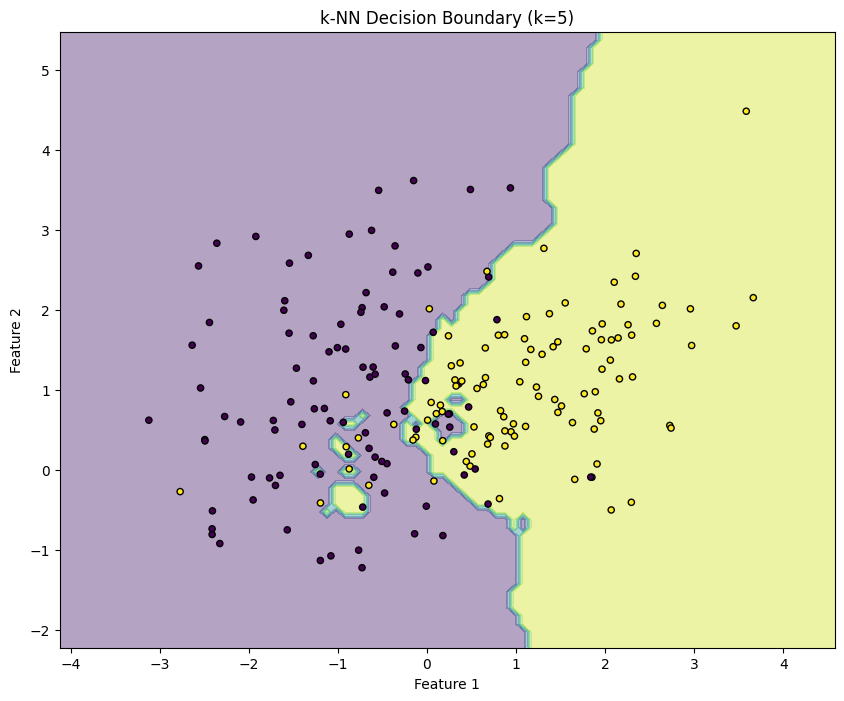

In [7]:
# Create a sample dataset
def create_demo_data():
    """Create a simple 2D classification dataset"""
    X, y = make_classification(
        n_samples=200,           # 200 data points
        n_features=2,            # 2 features (so we can visualize)
        n_redundant=0,           # No redundant features
        n_informative=2,         # Both features are informative
        n_clusters_per_class=1,  # Simple structure
        random_state=42
    )
    return X, y

# Demo and visualization
def demo_knn():
    # Create and split data
    X, y = create_demo_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print("=== k-NN from Scratch Demo ===")
    print(f"Training samples: {len(X_train)}")
    print(f"Test samples: {len(X_test)}")
    
    # Test different values of k
    for k in [1, 3, 5]:
        print(f"\n--- Testing k={k} ---")
        
        # Create and train model
        knn = KNearestNeighbors(k=k)
        knn.fit(X_train, y_train)
        
        # Make predictions
        y_pred = knn.predict(X_test)
        accuracy = knn.score(X_test, y_test)
        
        print(f"Accuracy: {accuracy:.3f}")
    
    # Visualize the decision boundary
    visualize_decision_boundary(knn, X, y, k)

def visualize_decision_boundary(model, X, y, k):
    """Create a cool visualization of the decision boundary"""
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Predict for each point in mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(f'k-NN Decision Boundary (k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Run the demo
if __name__ == "__main__":
    demo_knn()